Day - 33 Assignment

Question 1 :

 ​Use User Data set and show the accuracy through the SVM model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 

In [18]:
data = pd.read_csv("D:/Dataset/User_Data - Arindam Dev.csv")

In [19]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
data.shape

(400, 5)

In [23]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Now that our data has no null values and also about the rows and columns, we also know that what all features are useful for predicting whether or not user will not purchase, Let's drop unuseful features.....

In [42]:
updated_data = data.drop(["User ID"], axis=1)
updated_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


As we can see we have one categorical feature, so we need to convert that into numerical from.

In [39]:
gender = pd.get_dummies(data["Gender"])
gender.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


Let's drop the old Gender column and then concat this new Gender column.

In [43]:
updated_data = updated_data.drop("Gender", axis=1)
updated_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
updated_data = updated_data.join(gender)

In [47]:
updated_data.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


It's time to split dependent and independent features......

In [49]:
X = updated_data.drop("Purchased", axis=1).values
y = updated_data.iloc[:,2].values

In [100]:
print(X.shape, y.shape)

(400, 4) (400,)


Now split the data for training and testing

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 4) (100, 4) (300,) (100,)


Let's standarised the independent features using Standarscaler

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Hurrah! we have all the things set, so now it's time of model building...

In [91]:
sv_c = SVC(kernel="rbf",gamma=2**-2,random_state=42)
sv_c.fit(X_train, y_train)

SVC(gamma=0.25, random_state=42)

In [92]:
ypred = sv_c.predict(X_test)

In [93]:
accuracy_score(y_test, ypred)

0.94

As we can see above we have 94% accuracy, now we will use the confusion metrix and heatmap to clearly understand where it is predicting wrong.

In [94]:
cm = confusion_matrix(y_test, ypred)
cm

array([[59,  4],
       [ 2, 35]], dtype=int64)

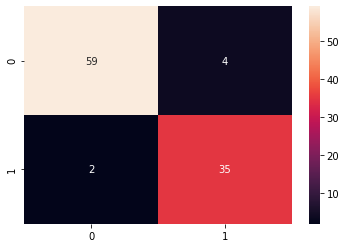

In [95]:
sns.heatmap(cm, annot=True)

-------------------------------------------Keep Learning, Keep Improving----------------------------------------------